<a href="https://colab.research.google.com/github/Charly1368/Proyecto-G35-Modulo-II-/blob/main/Estad%C3%ADstica_Inferencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Estadística Inferencial:


## 1. Estimadores y sus propiedades

### 1.1. Definición formal
Un estimador es una función de los datos muestrales que aproxima un parámetro poblacional desconocido. Matemáticamente, si $ X_1, X_2, \dots, X_n $ son variables aleatorias que representan una muestra, un estimador $ \hat{\theta} $ del parámetro $ \theta $ es una función:

$$
\hat{\theta} = g(X_1, X_2, \dots, X_n)
$$

### 1.2. Propiedades de los estimadores

#### 1.2.1. Insesgadez
Un estimador $ \hat{\theta} $ es insesgado si su esperanza matemática coincide con el parámetro poblacional:

$$
E[\hat{\theta}] = \theta
$$

**Ejemplo:**
- La media muestral $ \bar{X} $ es un estimador insesgado de $ \mu $, ya que $ E[\bar{X}] = \mu $.

- La varianza muestral $ S^2 = \frac{1}{n-1} \sum (X_i - \bar{X})^2 $ es insesgada para $ \sigma^2 $, mientras que $ \frac{1}{n} \sum (X_i - \bar{X})^2 $ es sesgada.

#### 1.2.2. Consistencia
Un estimador es consistente si converge en probabilidad al parámetro verdadero cuando $ n \to \infty $:

$$
\lim_{n \to \infty} P(|\hat{\theta} - \theta| > \epsilon) = 0 \quad \forall \epsilon > 0
$$

**Condiciones suficientes:**
- Insesgadez asintótica $$ \lim_{n \to \infty} E[\hat{\theta}] = \theta $$.
- Varianza decreciente $$ \lim_{n \to \infty} \text{Var}(\hat{\theta}) = 0 $$.

#### 1.2.3. Eficiencia
Dos estimadores insesgados $ \hat{\theta}_1 $ y $ \hat{\theta}_2 $ se comparan mediante su varianza. El más eficiente es el de menor varianza:

$$
\text{Var}(\hat{\theta}_1) < \text{Var}(\hat{\theta}_2) \implies \hat{\theta}_1 \text{ es más eficiente.}
$$

**Ejemplo:**
- La media muestral es el estimador más eficiente de \( \mu \) bajo distribución normal.

#### 1.2.4. Suficiencia
Un estimador es suficiente si contiene toda la información relevante sobre $ \theta $ presente en la muestra.

**Criterio de factorización de Fisher-Neyman:**

$$
f(X_1, \dots, X_n \mid \theta) = g(\hat{\theta} \mid \theta) \cdot h(X_1, \dots, X_n)
$$

donde $ h $ no depende de $ \theta $.

---

## 2. Intervalos de confianza (IC)


### 2.1. Concepto y fundamentación
Un intervalo de confianza al $ (1-\alpha) \times 100\% $ para un parámetro $ \theta $ es un rango $ (L, U) $ tal que:

$$
P(L \leq \theta \leq U) = 1 - \alpha
$$

**Interpretación correcta:** Si construyéramos muchos ICs, el $ (1-\alpha)\% $ de ellos contendría el verdadero $ \theta $.

### 2.2. IC para la media poblacional $ \mu $

**Caso 1:** Varianza poblacional $ \sigma^2 $ conocida:

$$
IC = \bar{X} \pm z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

**Ejemplo:** Ilustrativo con código Python para calcular intervalos de confianza.

IC del 95% para μ: (9.662, 10.538)


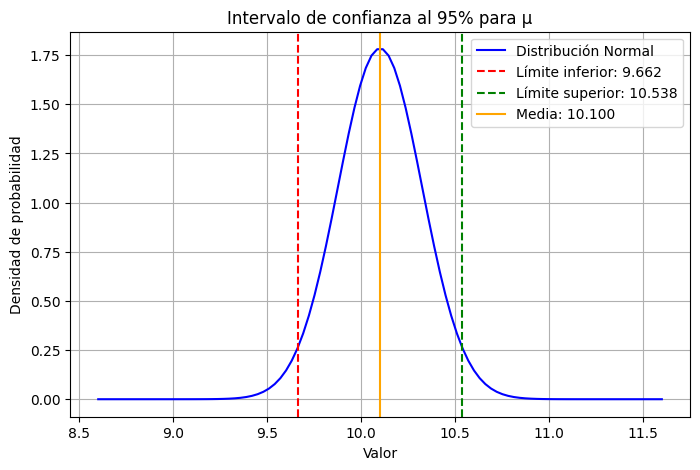

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos
muestra = np.array([10.2, 9.8, 10.5, 10.1, 9.9])
sigma = 0.5  # conocido
nivel_confianza = 0.95

# Cálculo
media = np.mean(muestra)
z_critico = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)
margen_error = z_critico * (sigma / np.sqrt(len(muestra)))
ic = (media - margen_error, media + margen_error)

print(f"IC del 95% para μ: ({ic[0]:.3f}, {ic[1]:.3f})")

# Graficar los resultados
x = np.linspace(media - 3*sigma, media + 3*sigma, 100)
y = stats.norm.pdf(x, loc=media, scale=sigma / np.sqrt(len(muestra)))

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Distribución Normal", color="blue")
plt.axvline(ic[0], color="red", linestyle="--", label=f"Límite inferior: {ic[0]:.3f}")
plt.axvline(ic[1], color="green", linestyle="--", label=f"Límite superior: {ic[1]:.3f}")
plt.axvline(media, color="orange", linestyle="-", label=f"Media: {media:.3f}")
plt.title(f"Intervalo de confianza al {nivel_confianza*100:.0f}% para μ")
plt.xlabel("Valor")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid()
plt.show()

### Caso 2: Varianza poblacional desconocida (usando t de Student)

Cuando la varianza poblacional $( \sigma^2 $) es desconocida, se utiliza la distribución t de Student para construir el intervalo de confianza.

#### Fórmula del Intervalo de Confianza:
$$
IC = \bar{X} \pm t_{\alpha/2, n-1} \cdot \frac{S}{\sqrt{n}}
$$

Donde:
- $ \bar{X} $: Media muestral.
- $ t_{\alpha/2, n-1} $: Valor crítico de la distribución t de Student con $ n-1 $ grados de libertad.
- $ S $: Desviación estándar muestral.
- $ n $: Tamaño de la muestra.

#### Interpretación:
El intervalo de confianza $ IC $ proporciona un rango en el cual es probable que se encuentre el verdadero valor de la media poblacional $ \mu $, con un nivel de confianza de $ 1-\alpha $.



Media muestral: 48.12
Intervalo de confianza al 95%: (44.76, 51.48)


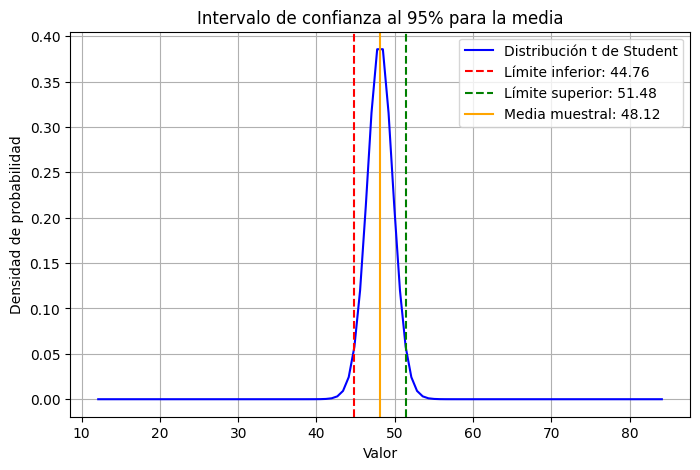

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos de ejemplo
np.random.seed(42)  # Para reproducibilidad
n = 30  # Tamaño de la muestra
mu = 50  # Media real de la población
sigma = 10  # Desviación estándar real de la población

# Generar muestra aleatoria
sample = np.random.normal(loc=mu, scale=sigma, size=n)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)  # Desviación estándar muestral

# Nivel de confianza
alpha = 0.05  # Nivel de significancia
confidence = 1 - alpha
df = n - 1  # Grados de libertad
t_critical = stats.t.ppf(1 - alpha / 2, df)  # Valor crítico t

# Intervalo de confianza
margin_of_error = t_critical * (sample_std / np.sqrt(n))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"Media muestral: {sample_mean:.2f}")
print(f"Intervalo de confianza al {confidence*100:.0f}%: ({ci_lower:.2f}, {ci_upper:.2f})")

# Graficar la distribución y el intervalo de confianza
x = np.linspace(sample_mean - 4*sample_std, sample_mean + 4*sample_std, 100)
y = stats.t.pdf((x - sample_mean) / (sample_std / np.sqrt(n)), df)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Distribución t de Student", color="blue")
plt.axvline(ci_lower, color="red", linestyle="--", label=f"Límite inferior: {ci_lower:.2f}")
plt.axvline(ci_upper, color="green", linestyle="--", label=f"Límite superior: {ci_upper:.2f}")
plt.axvline(sample_mean, color="orange", linestyle="-", label=f"Media muestral: {sample_mean:.2f}")
plt.title(f"Intervalo de confianza al {confidence*100:.0f}% para la media")
plt.xlabel("Valor")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid()
plt.show()

## 2.3. IC para la proporción poblacional $p$


La fórmula es:

$$
IC = \hat{p} \pm z_{\alpha / 2} \cdot \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
$$

Descripción del código

- Entradas: Se define la proporción muestral $(\hat{p} = 0.6)$, el tamaño de muestra $(n = 100)$, y el nivel de significancia $(\alpha = 0.05)$.

- Cálculos: Se obtienen el valor crítico $z_{\alpha/2}$, el error estándar, y los límites inferior y superior del intervalo de confianza.

- Gráfica: Se visualiza la distribución normal de la proporción muestral, destacando el intervalo de confianza y la proporción muestral.

Intervalo de confianza del 95%: [0.5040, 0.6960]


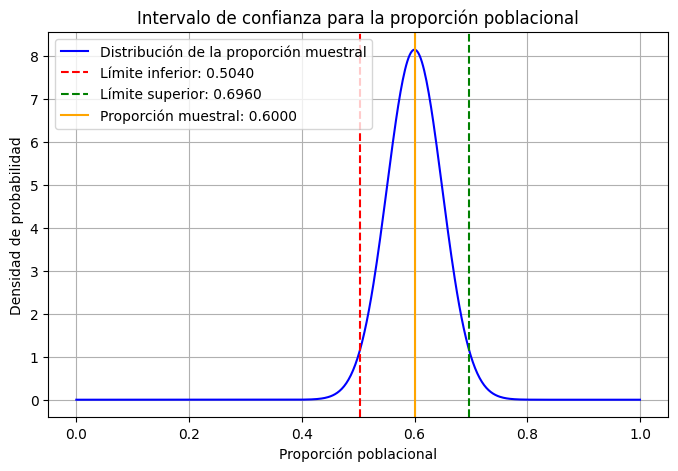

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros iniciales
p_hat = 0.6  # Proporción muestral
n = 100      # Tamaño de la muestra
alpha = 0.05 # Nivel de significancia (para un nivel de confianza del 95%)

# Cálculo del valor crítico z_alpha/2
z_alpha_over_2 = norm.ppf(1 - alpha / 2)

# Cálculo del error estándar
error_estandar = np.sqrt((p_hat * (1 - p_hat)) / n)

# Cálculo del intervalo de confianza
lim_inferior = p_hat - z_alpha_over_2 * error_estandar
lim_superior = p_hat + z_alpha_over_2 * error_estandar

# Resultados
print(f"Intervalo de confianza del 95%: [{lim_inferior:.4f}, {lim_superior:.4f}]")

# Gráfica del intervalo de confianza
x = np.linspace(0, 1, 500)
y = norm.pdf(x, loc=p_hat, scale=error_estandar)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Distribución de la proporción muestral", color="blue")
plt.axvline(lim_inferior, color='red', linestyle='--', label=f"Límite inferior: {lim_inferior:.4f}")
plt.axvline(lim_superior, color='green', linestyle='--', label=f"Límite superior: {lim_superior:.4f}")
plt.axvline(p_hat, color='orange', linestyle='-', label=f"Proporción muestral: {p_hat:.4f}")

plt.title("Intervalo de confianza para la proporción poblacional")
plt.xlabel("Proporción poblacional")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid()
plt.show()

## Pruebas de hipótesis

Las pruebas de hipótesis son procedimientos para evaluar afirmaciones sobre parámetros poblacionales.

### Pasos básicos:
1. Establecer hipótesis nula $(H_0$) y alternativa $(H_1$).
2. Seleccionar nivel de significancia $(\alpha$).
3. Calcular estadístico de prueba.
4. Determinar región crítica o valor $p$.
5. Tomar decisión rechazar o no rechazar $(H_0$).

### Fórmulas comunes:
- Prueba $z$ para media $(\sigma)$ conocida:

  $$
  z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}
  $$

- Prueba $t$ para media $(\sigma)$ desconocida:
  $$
  t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
  $$

- Prueba $z$ para proporciones:
  $$
  z = \frac{\hat{p} - p_0}{\sqrt{p_0 (1 - p_0) / n}}
  $$

## Prueba de hipótesis para la media ($ \sigma $ desconocida)

### Hipótesis
- **Hipótesis nula ($ H_0 $):** $ \mu = \mu_0 $
- **Hipótesis alternativa $( H_1 )$:**
  - $ \mu \neq \mu_0 $ (prueba bilateral)
  - $ \mu > \mu_0 $ (prueba unilateral derecha)
  - $ \mu < \mu_0 $ (prueba unilateral izquierda)

### Estadístico de prueba
$$
t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
$$

### Regla de decisión
- **Prueba bilateral:** Rechazar $ H_0 $ si $ |t| > t_{\alpha/2, n-1} $
- **Prueba unilateral derecha:** Rechazar $ H_0 $ si $ t > t_{\alpha, n-1} $
- **Prueba unilateral izquierda:** Rechazar $ H_0 $ si $ t < -t_{\alpha, n-1} $

### Alternativamente:
Rechazar $ H_0 $ si el valor $p$ $ < \alpha $.

**Ejemplo:**

Estadístico t: 8.4283
Valor crítico: ±2.3646
Valor p: 0.0001
Rechazar H₀: hay evidencia suficiente para concluir que μ ≠ 28.0


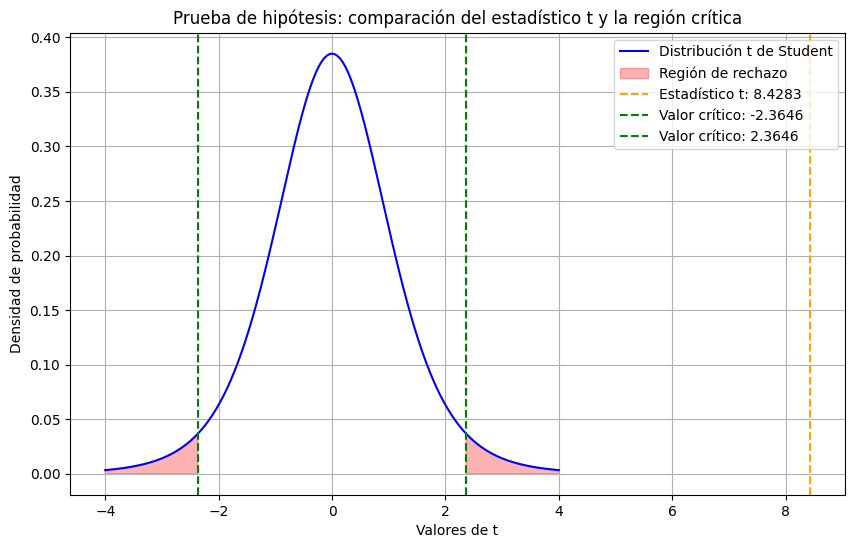

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos y parámetros de prueba
muestra = [28.5, 29.3, 28.7, 29.0, 29.5, 28.9, 29.2, 28.8]
mu0 = 28.0  # Valor hipotético
alpha = 0.05

# Calcular estadístico de prueba
x_barra = np.mean(muestra)
s = np.std(muestra, ddof=1)
n = len(muestra)
t_stat = (x_barra - mu0) / (s / np.sqrt(n))

# Valor crítico (prueba bilateral)
t_critico = stats.t.ppf(1 - alpha / 2, df=n-1)

# Valor p
valor_p = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-1))

print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor crítico: ±{t_critico:.4f}")
print(f"Valor p: {valor_p:.4f}")

# Decisión
if abs(t_stat) > t_critico:
    print("Rechazar H₀: hay evidencia suficiente para concluir que μ ≠ 28.0")
else:
    print("No rechazar H₀: no hay evidencia suficiente para concluir que μ ≠ 28.0")

# Graficar la distribución t y los resultados
x = np.linspace(-4, 4, 500)  # Eje x para la curva t de Student
y = stats.t.pdf(x, df=n-1)  # Densidad de probabilidad t

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Distribución t de Student", color="blue")
plt.fill_between(x, y, where=(x < -t_critico) | (x > t_critico), color="red", alpha=0.3, label="Región de rechazo")
plt.axvline(t_stat, color="orange", linestyle="--", label=f"Estadístico t: {t_stat:.4f}")
plt.axvline(-t_critico, color="green", linestyle="--", label=f"Valor crítico: -{t_critico:.4f}")
plt.axvline(t_critico, color="green", linestyle="--", label=f"Valor crítico: {t_critico:.4f}")
plt.title("Prueba de hipótesis: comparación del estadístico t y la región crítica")
plt.xlabel("Valores de t")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid()
plt.show()